In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import PRGn
import seaborn as sns
import calendar
from datetime import date
from datetime import datetime
plt.style.use('ggplot')
from pivottablejs import pivot_ui

In [2]:
headway = pd.read_csv("../data/Headway_Data.csv", nrows=1981716)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
headway.drop(headway.columns[[-1,-2, -3, -4, -5, -6, -7, -8]], axis = 1, inplace=True)

In [5]:
headway.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN


In [6]:
headway['DATE'] =  pd.to_datetime(headway['DATE'])
headway['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in headway['DATE']]
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,WEEKDAY
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,Monday
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,Monday
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,Monday
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,Monday
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,Monday


In [7]:
summer = headway[(headway["DATE"] >= '2022-06-01') & (headway["DATE"] <= '2022-08-01')]

In [8]:
##initialize empty list to fill with results
ON_TIME_PERF = []

##loop to check adherence column to determine if early, late, or on time append

for x in summer['ADHERENCE']:
    if x > 0:
        ON_TIME_PERF.append('EARLY')
    elif x < 0:
        ON_TIME_PERF.append('LATE')
    else:
        ON_TIME_PERF.append('ON TIME')

In [9]:
#create a column in the data frame and = to the list to add 
summer['Time']  = ON_TIME_PERF

C:\Users\cside\AppData\Local\Temp\ipykernel_7236\3281385916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['Time']  = ON_TIME_PERF


In [10]:
RUSH_HOUR = []

for x in summer['SCHEDULED_TIME']:
    if x >= '07:00:00' and x <= '09:30:00':
        RUSH_HOUR.append('Morning Rush')
    elif x >= '16:00:00' and x <= '18:00:00':
        RUSH_HOUR.append('Evening Rush')
    else:
        RUSH_HOUR.append('No Rush')

summer['Rush_hour']  = RUSH_HOUR

C:\Users\cside\AppData\Local\Temp\ipykernel_7236\2115911605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['Rush_hour']  = RUSH_HOUR


In [11]:
TIME_OF_DAY = []
for x in summer['SCHEDULED_TIME']:
    if x >= '04:00:00' and x <= '06:00:00':
        TIME_OF_DAY.append('04:00 - 06:00')
    elif x > '06:00:00' and x <= '08:00:00':
        TIME_OF_DAY.append('06:00 - 08:00')
    elif x > '08:00:00' and x <= '10:00:00':
        TIME_OF_DAY.append('08:00 - 10:00')
    elif x > '10:00:00' and x <= '12:00:00':
        TIME_OF_DAY.append('10:00 - 12:00')
    elif x > '12:00:00' and x <= '14:00:00':
        TIME_OF_DAY.append('12:00 - 14:00')
    elif x > '14:00:00' and x <= '16:00:00':
        TIME_OF_DAY.append('14:00 - 16:00')
    elif x > '16:00:00' and x <= '18:00:00':
        TIME_OF_DAY.append('16:00 - 18:00')
    elif x > '18:00:00' and x <= '20:00:00':
        TIME_OF_DAY.append('18:00 - 20:00')
    elif x > '20:00:00' and x <= '22:00:00':
        TIME_OF_DAY.append('20:00 - 22:00')
    elif x > '22:00:00' and x <= '24:00:00':
        TIME_OF_DAY.append('22:00 - 24:00')
    else:
        TIME_OF_DAY.append('24:00 - 25:00+')
len(TIME_OF_DAY)



348987

In [12]:
summer['Time_day'] = TIME_OF_DAY

C:\Users\cside\AppData\Local\Temp\ipykernel_7236\1485344661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['Time_day'] = TIME_OF_DAY


In [13]:
summer.head(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,WEEKDAY,Time,Rush_hour,Time_day
1109085,120220601,1,85713482,2022-06-01,22,2200,1280,311622,0,TO DOWNTOWN,MHSP,14.0,1,36.178360,-86.845441,04:42:00,04:26:03,04:41:02,0.966666,NaN,NaN,NaN,Wednesday,EARLY,No Rush,04:00 - 06:00
1109086,120220601,1,85713483,2022-06-01,22,2200,1280,311622,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:45:38,04:45:38,0.366666,NaN,NaN,NaN,Wednesday,EARLY,No Rush,04:00 - 06:00
1109087,120220601,1,85713484,2022-06-01,22,2200,1280,311622,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:53:16,04:53:16,0.733333,NaN,NaN,NaN,Wednesday,EARLY,No Rush,04:00 - 06:00
1109088,120220601,1,85713485,2022-06-01,22,2200,1280,311622,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,04:59:40,04:59:40,10.333333,NaN,NaN,NaN,Wednesday,EARLY,No Rush,04:00 - 06:00
1109089,120220601,1,85713486,2022-06-01,22,2200,1280,311641,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,04:59:40,05:17:15,-2.250000,NaN,NaN,NaN,Wednesday,LATE,No Rush,04:00 - 06:00
1109090,120220601,1,85713487,2022-06-01,22,2200,1280,311641,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,05:25:00,05:24:06,05:24:06,0.900000,NaN,NaN,NaN,Wednesday,EARLY,No Rush,04:00 - 06:00
1109091,120220601,1,85713488,2022-06-01,22,2200,1280,311641,0,FROM DOWNTOWN,MHSP,14.0,2,36.178360,-86.845441,05:32:00,05:31:04,05:31:04,0.933333,NaN,NaN,NaN,Wednesday,EARLY,No Rush,04:00 - 06:00
1109092,120220601,1,85713489,2022-06-01,22,2200,1280,311607,0,TO DOWNTOWN,MHSP,14.0,1,36.178360,-86.845441,05:42:00,05:31:04,05:41:02,0.966666,35.0,32.116666,-2.883334,Wednesday,EARLY,No Rush,04:00 - 06:00
1109093,120220601,1,85713490,2022-06-01,22,2200,1280,311607,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,05:46:00,05:46:32,05:46:32,-0.533333,35.0,33.500000,-1.500000,Wednesday,LATE,No Rush,04:00 - 06:00
1109094,120220601,1,85713491,2022-06-01,22,2200,1280,311607,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,05:54:00,05:53:48,05:53:48,0.200000,15.0,15.250000,0.250000,Wednesday,EARLY,No Rush,04:00 - 06:00


In [14]:
mon = summer.loc[summer['WEEKDAY']=='Monday'] 
tue = summer.loc[summer['WEEKDAY']=='Tuesday'] 
wed = summer.loc[summer['WEEKDAY']=='Wednesday'] 
thu = summer.loc[summer['WEEKDAY']=='Thursday'] 
fri = summer.loc[summer['WEEKDAY']=='Friday'] 
sat = summer.loc[summer['WEEKDAY']=='Saturday'] 
sun = summer.loc[summer['WEEKDAY']=='Sunday']

In [15]:
print('monday')
print(mon['Time'].value_counts())
print('')
print('tueday')
print(tue['Time'].value_counts())
print('')
print('wednesday')
print(wed['Time'].value_counts())
print('')
print('thursday')
print(thu['Time'].value_counts())
print('')
print('friday')
print(fri['Time'].value_counts())
print('')
print('saturday')
print(sat['Time'].value_counts())
print('')
print('sunday')
print(sun['Time'].value_counts())

monday
LATE       40250
EARLY      13390
ON TIME     1207
Name: Time, dtype: int64

tueday
LATE       38203
EARLY      11806
ON TIME     1130
Name: Time, dtype: int64

wednesday
LATE       41470
EARLY      12855
ON TIME     3359
Name: Time, dtype: int64

thursday
LATE       43029
EARLY      13119
ON TIME     1521
Name: Time, dtype: int64

friday
LATE       43503
EARLY      12569
ON TIME     1589
Name: Time, dtype: int64

saturday
LATE       28299
EARLY       7517
ON TIME     1105
Name: Time, dtype: int64

sunday
LATE       24810
EARLY       7645
ON TIME      611
Name: Time, dtype: int64


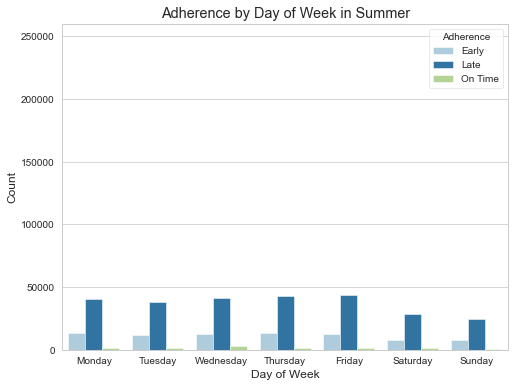

In [16]:
early = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                       'y':[13390, 11806, 12855, 13119, 12569, 7517, 7645]})
late = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         'y':[40250, 38203, 41470, 43029, 43503, 28299, 24810]})
ontime = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                          'y':[1207, 1130, 3359, 1521, 1589, 1105, 611]})

early['Adherence']='Early'
late['Adherence']='Late'
ontime['Adherence']='On Time'
res=pd.concat([early, late, ontime])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Adherence', palette='Paired', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.ylim(0, 260000)
plt.title('Adherence by Day of Week in Summer')
plt.savefig('adh-by-dow.png')
plt.show()

In [17]:
mon.head(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,WEEKDAY,Time,Rush_hour,Time_day
1136101,120220606,1,85927252,2022-06-06,22,2200,1419,311622,0,TO DOWNTOWN,MHSP,14.0,1,36.178360,-86.845441,04:42:00,04:25:28,04:41:49,0.183333,NaN,NaN,NaN,Monday,EARLY,No Rush,04:00 - 06:00
1136102,120220606,1,85927253,2022-06-06,22,2200,1419,311622,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:46:30,04:46:30,-0.500000,NaN,NaN,NaN,Monday,LATE,No Rush,04:00 - 06:00
1136103,120220606,1,85927254,2022-06-06,22,2200,1419,311622,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:53:05,04:53:05,0.916666,NaN,NaN,NaN,Monday,EARLY,No Rush,04:00 - 06:00
1136104,120220606,1,85927255,2022-06-06,22,2200,1419,311622,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:01:58,05:01:58,8.033333,NaN,NaN,NaN,Monday,EARLY,No Rush,04:00 - 06:00
1136105,120220606,1,85927256,2022-06-06,22,2200,1419,311641,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:01:58,05:14:03,0.950000,NaN,NaN,NaN,Monday,EARLY,No Rush,04:00 - 06:00
1136106,120220606,1,85927257,2022-06-06,22,2200,1419,311641,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,05:25:00,05:24:33,05:24:33,0.450000,NaN,NaN,NaN,Monday,EARLY,No Rush,04:00 - 06:00
1136107,120220606,1,85927258,2022-06-06,22,2200,1419,311641,0,FROM DOWNTOWN,MHSP,14.0,2,36.178360,-86.845441,05:32:00,05:33:30,05:33:30,-1.500000,NaN,NaN,NaN,Monday,LATE,No Rush,04:00 - 06:00
1136108,120220606,1,85927259,2022-06-06,22,2200,1419,311607,0,TO DOWNTOWN,MHSP,14.0,1,36.178360,-86.845441,05:42:00,05:33:30,05:42:05,-0.083333,35.0,33.383333,-1.616667,Monday,LATE,No Rush,04:00 - 06:00
1136109,120220606,1,85927260,2022-06-06,22,2200,1419,311607,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,05:46:00,05:46:32,05:46:32,-0.533333,35.0,34.083333,-0.916667,Monday,LATE,No Rush,04:00 - 06:00
1136110,120220606,1,85927261,2022-06-06,22,2200,1419,311607,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,05:54:00,05:54:26,05:54:26,-0.433333,15.0,12.900000,-2.100000,Monday,LATE,No Rush,04:00 - 06:00


In [18]:
df = (mon.pivot_table(values=['ADHERENCE', 'HDWY_DEV'], 
                    index=['WEEKDAY', 'ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE'], 
                    columns='Time', 
                    aggfunc='first')
        .swaplevel(1, 0, axis=1)
        .sort_index(level=0, axis=1, sort_remaining=False))
df


Time                                        EARLY                  LATE  \
                                        ADHERENCE   HDWY_DEV  ADHERENCE   
WEEKDAY ROUTE_ABBR ROUTE_STOP_SEQUENCE                                    
Monday  3          2.0                   1.416666  -5.950000  -1.450000   
                   3.0                   0.783333  -1.183334  -1.566666   
                   4.0                   0.333333  -0.700000  -2.416666   
                   5.0                   0.033333  -0.166667  -2.700000   
                   6.0                   1.483333  -4.283334  -2.350000   
                   7.0                   0.133333  -2.383334  -0.266666   
                   8.0                   3.966666  -2.000000  -7.100000   
        7          2.0                   0.166666        NaN -12.183333   
                   3.0                   4.500000  -6.516667  -0.750000   
                   4.0                   0.866666  -3.250000  -2.350000   
                   5.0                   6.116666  -9.150000  -1.583333   
        22         1.0                   8.033333  -1.133334  -0.333333   
                   2.0                   7.300000        NaN  -0.283333   
                   5.0                   0.916666  -2.166667  -0.433333   
                   6.0                   5.666666  -2.300000  -1.500000   
                   7.0                   1.250000  -5.483334  -3.050000   
                   8.0                   0.850000  -3.200000  -0.750000   
                   9.0                   0.416666  -0.216667  -4.733333   
                   10.0                  1.166666  -3.183334  -0.500000   
                   12.0                  0.450000  -3.650000  -1.800000   
                   13.0                  0.033333        NaN  -5.333333   
                   14.0                  0.183333  -1.616667  -1.500000   
        23         2.0                   4.466666  -3.650000  -6.300000   
                   3.0                   0.016666   0.850000  -0.850000   
                   4.0                   0.616666  -3.050000  -1.950000   
                   5.0                   4.750000  -5.266667  -2.750000   
                   6.0                  17.350000  -1.283334  -1.883333   
                   7.0                   1.500000        NaN  -2.450000   
                   8.0                   0.166666  -4.333334  -3.416666   
        50         12.0                  4.900000  -1.366667  -2.250000   
                   13.0                  0.283333  -0.566667  -0.233333   
                   14.0                  0.116666  -0.666667  -3.900000   
                   15.0                  0.166666  -0.283334  -0.100000   
                   16.0                  0.050000  -1.933334  -0.333333   
                   17.0                  2.900000  -2.133334  -0.183333   
        52         2.0                   1.833333  -1.933334  -2.700000   
                   3.0                   1.000000  -3.033334  -0.316666   
                   4.0                   0.350000  -3.283334  -0.300000   
                   5.0                   0.100000  -0.033334  -1.650000   
                   6.0                   1.116666  -1.983334  -4.083333   
                   7.0                   0.950000  -2.250000  -1.300000   
                   8.0                   3.366666 -11.600000  -3.483333   
                   9.0                   0.416666  -3.100000  -0.100000   
                   10.0                  0.666666        NaN  -0.750000   
        55         5.0                   2.166666 -11.533334  -0.300000   
                   6.0                   0.550000  -1.900000  -4.600000   
                   8.0                   0.016666  -0.933334  -0.800000   
                   9.0                   0.066666  -0.833334  -3.250000   
                   10.0                  0.466666  -4.016667  -2.133333   
                   11.0                  1.983333  -2.466667  -4.383333   
        56         6.0   

In [19]:
psummer = summer[['WEEKDAY', 'ROUTE_ABBR', 'Time']]

In [22]:
psummer.dtypes

WEEKDAY       object
ROUTE_ABBR     int64
Time          object
dtype: object

In [ ]:
psummer.pivot_table('Time', index='WEEKDAY', columns='ROUTE_ABBR', aggfunc='sum')

In [39]:
sns.set()
psummer.pivot_table(index= ['WEEKDAY', 'ROUTE_ABBR'] , columns='Time', 
                        aggfunc=len, fill_value=0)
#plt.ylabel('Time Count');

Time                  EARLY  LATE  ON TIME
WEEKDAY   ROUTE_ABBR                      
Friday    3            1633  5810      240
          7             786  2113       44
          22           1523  2683      199
          23           1943  4787      332
          50           1412  5437       73
          52           1890  6113      159
          55           1535  8464      278
          56           1847  8096      264
Monday    3            1564  5564      219
          7             861  1882       85
          22           1374  2616      177
          23           1997  4475      257
          50           1564  5040       82
          52           1973  5680      160
          55           1918  7617      113
          56           2139  7376      114
Saturday  3             765  4291      154
          7             521  1424        9
          22            883  1693      113
          23            879  3013      431
          50           1124  3822       34
          52           1221  3868       67
          55           1075  5748      148
          56           1049  4440      149
Sunday    3             880  3893       69
          7             644  1179       13
          22            654  1494       57
          23           1174  2643      265
          50           1087  3522       34
          52           1188  3636       63
          55            986  4239       45
          56           1032  4204       65
Thursday  3            1451  5999      233
          7             851  2043       55
          22           1667  2542      174
          23           1906  4714      421
          50           1377  5433      126
          52           2001  6095       80
          55           1635  8444      161
          56           2231  7759      271
Tuesday   3            1355  5149      299
          7             742  1853       27
          22           1383  2374      140
          23           1710  4417      125
          50           1187  4899       58
          52           1729  5331      222
          55           1690  7246      166
          56           2010  6934       93
Wednesday 3            1408  5745      532
          7             833  1985      146
          22           1592  2465      333
          23           1957  4529      557
          50           1391  5295      258
          52           1818  5921      422
          55           1754  8005      511
          56           2102  7525      600

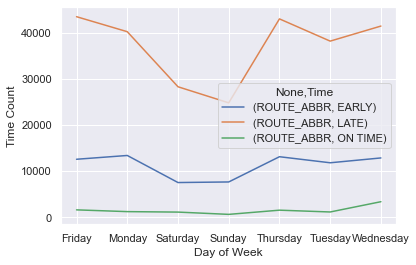

In [44]:
sns.set()
psummer.pivot_table(index= 'WEEKDAY' , columns='Time', 
                        aggfunc=len, fill_value=0).plot()
plt.ylabel('Time Count');
plt.xlabel('Day of Week');


table.sortlevel(["A","B"], ascending= [False,True], sort_remaining=False, inplace=True)
table.sortlevel(["C"], axis=1, ascending=False,  sort_remaining=False, inplace=True)
print(table)